In [8]:
pip install numpy==1.21.6

     ---------------------------------------- 14.0/14.0 MB 2.0 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.24.3
    Uninstalling numpy-1.24.3:
      Successfully uninstalled numpy-1.24.3
Note: you may need to restart the kernel to use updated packages.


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
codecarbon 2.1.4 requires fuzzywuzzy, which is not installed.
codecarbon 2.1.4 requires py-cpuinfo, which is not installed.
tensorflow 2.9.1 requires libclang>=13.0.0, which is not installed.
tensorflow 2.9.1 requires tensorflow-io-gcs-filesystem>=0.23.1, which is not installed.
daal4py 2021.3.0 requires daal==2021.2.3, which is not installed.
torchvision 0.14.1 requires torch==1.13.1, but you have torch 1.7.1 which is incompatible.
kornia 0.6.9 requires torch>=1.9.1, but you have torch 1.7.1 which is incompatible.
tensorflow 2.9.1 requires flatbuffers<2,>=1.12, but you have flatbuffers 2.0 which is incompatible.
tensorflow 2.9.1 requires gast<=0.4.0,>=0.2.1, but you have gast 0.5.3 which is incompatible.
tensorflow 2.9.1 requires protobuf<3.20,>=3.9.2, but you have protobuf 3.20.3 which is incompatible.
numba 0.5

In [1]:
# Importing Necesarry Packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import keras
from keras.layers import Dense, Activation,Dropout
from keras.models import Sequential
import warnings
warnings.filterwarnings("ignore") 

In [16]:
b = load_boston()
print(boston.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [2]:
# Loading Data
boston = load_boston()
data = pd.DataFrame(boston.data)
data.columns = boston.feature_names
data['PRICE'] = boston.target 
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [3]:
# Data Exploration
print(data.shape)
print(data.dtypes)
print(data.isnull().sum())
print(data.describe())

(506, 14)
CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD        float64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
PRICE      float64
dtype: object
CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
PRICE      0
dtype: int64
             CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000

<AxesSubplot: >

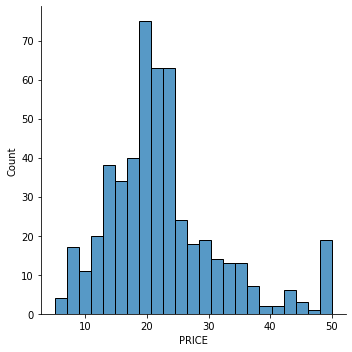

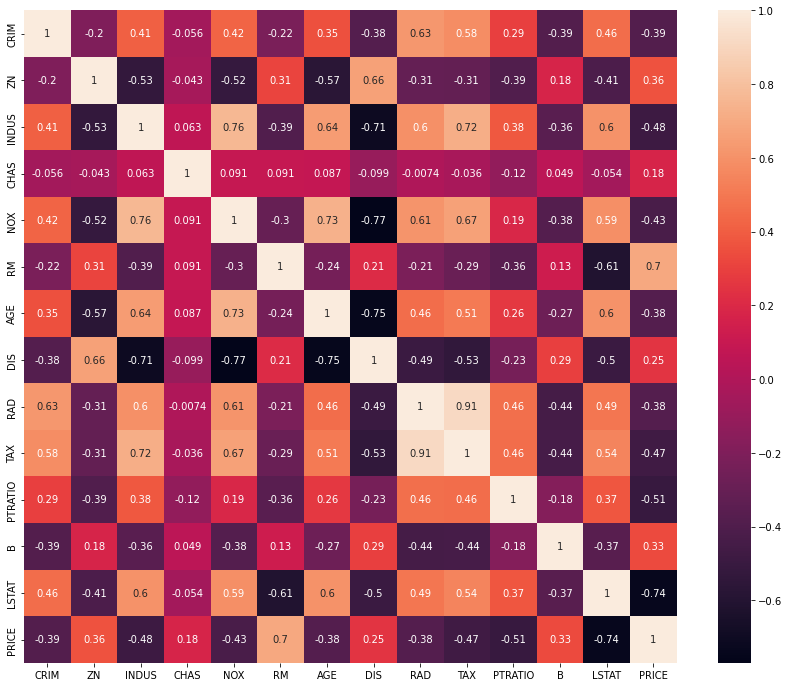

In [4]:
# Data Visualization
sns.displot(data.PRICE)

correlation = data.corr()
correlation.loc['PRICE']

fig,axes = plt.subplots(figsize=(15,12))
sns.heatmap(correlation,square = True,annot = True)

In [5]:
# Splitting Data into testing and training data
X = data.iloc[:,:-1]
y= data.PRICE
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 4)

# Normalizing the data
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [6]:
# Model Building
model = Sequential()
model.add(Dense(128,activation  = 'relu',input_dim =13))
model.add(Dense(64,activation  = 'relu'))
model.add(Dense(32,activation  = 'relu'))
model.add(Dense(16,activation  = 'relu'))
model.add(Dense(1))
model.compile(optimizer = 'adam',loss = 'mean_squared_error')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               1792      
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 16)                528       
                                                                 
 dense_4 (Dense)             (None, 1)                 17        
                                                                 
Total params: 12,673
Trainable params: 12,673
Non-trainable params: 0
_________________________________________________________________


In [7]:
# Fitting the data to the model
model.fit(X_train, y_train, epochs = 100)

Epoch 1/100
13/13 [==============================] - 1s 2ms/step - loss: 551.4073
Epoch 2/100
13/13 [==============================] - 0s 2ms/step - loss: 465.5171
Epoch 3/100
13/13 [==============================] - 0s 2ms/step - loss: 294.8768
Epoch 4/100
13/13 [==============================] - 0s 2ms/step - loss: 113.0966
Epoch 5/100
13/13 [==============================] - 0s 2ms/step - loss: 58.8054
Epoch 6/100
13/13 [==============================] - 0s 2ms/step - loss: 35.4246
Epoch 7/100
13/13 [==============================] - 0s 2ms/step - loss: 26.1651
Epoch 8/100
13/13 [==============================] - 0s 2ms/step - loss: 22.3389
Epoch 9/100
13/13 [==============================] - 0s 2ms/step - loss: 19.9996
Epoch 10/100
13/13 [==============================] - 0s 2ms/step - loss: 18.7302
Epoch 11/100
13/13 [==============================] - 0s 2ms/step - loss: 17.1339
Epoch 12/100
13/13 [==============================] - 0s 2ms/step - loss: 16.1021
Epoch 13/100
13/13 [=

In [8]:
# Evaluating the model
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
rmse = (np.sqrt(mean_squared_error(y_test, y_pred)))
print("R2 Score = ", r2)
print("RMSE Score = ", rmse)

4/4 [==============================] - 0s 4ms/step
R2 Score =  0.8813575236015109
RMSE Score =  3.3197300501775726


In [9]:
model2 = LinearRegression()

In [10]:
model2.fit(X_train, y_train)

LinearRegression()

In [11]:
y_pred2 = model2.predict(X_test)

In [12]:
r2 = r2_score(y_test, y_pred2)
rmse = (np.sqrt(mean_squared_error(y_test, y_pred2)))
print("R2 Score = ", r2)
print("RMSE Score = ", rmse)

R2 Score =  0.726345145970251
RMSE Score =  5.04178412140205
